<a href="https://colab.research.google.com/github/kwyrzyko/financial-statement-analysis-chatGPT4/blob/main/financial-statement-analysis-chatGPT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The primary objective of this project was to explore the capabilities of Large Language Models (LLMs), specifically ChatGPT-4, in financial analysis for non-technical users. I aimed to examine the following aspects through simplified examples:

*   To what extent are current LLMs capable of autonomously analyzing financial statements and providing valuable recommendations?
*   What is the potential transformative effects of this technology on the workflow of non-technical individuals (such as myself) and the ease of use?

Outlined below are the various steps undertaken and the outcomes achieved.

*Disclosure 1: I have no prior experience with Python coding; the complete code was generated by ChatGPT-4 with my guidance only.*

*Disclosure 2: For this project, I utilized a fictional database of General Ledger (GL) transactions spanning three years (2019-2021) as a foundation. This data was obtained from the [Financial Modeling and Valuation Analyst (FMVA)](https://corporatefinanceinstitute.com/certifications/financial-modeling-valuation-analyst-fmva-program/) training provided by the [Corporate Finance Institute (CFI)](https://corporatefinanceinstitute.com/).* 


Tools used:
- Google Colab
- Python
- GatGPT4



**Step I.** First, I requested ChatGPT-4's assistance in uploading the General Ledger (GL) Transactions data into Google Colab as a CSV file. I then asked it to create a DataFrame named 'raw_df' and analyze this DataFrame for errors. Additionally, I requested that it clean the data accordingly, addressing issues such as null fields, incorrect data types, and missing information.


In [ ]:
# I.1. Uploading the data
from google.colab import files
uploaded = files.upload()

Saving raw_df.csv to raw_df.csv


In [ ]:
# I.2. Creating the data frame
import pandas as pd
import io

# Read the uploaded CSV file and create a data frame
raw_df = pd.read_csv(io.BytesIO(uploaded['raw_df.csv']))

# Display the first few rows of the data frame
raw_df.head()


,Unnamed: 0,FactGLTranID,JournalID,GLTranDescription,GLTranAmount,GLTranDate,GLAcctNum,GLAcctName,Statement,Category,...,ManagerID,PreviousManagerID,ContactTel,AddressLine1,AddressLine2,ZipCode,RegionNum,RegionName,SalesRegionName,LastRefreshDate
0,0,1,609,Term Loan Injection,500000.00,2019-01-01,1000,Checking Account,Balance Sheet,Current Assets,...,9,NaN,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827
1,1,2,609,Term Loan Injection,-500000.00,2019-01-01,3600,Term Loan Payable,Balance Sheet,Non Current Liabilities,...,9,NaN,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827
2,2,3,1828,Term Loan - Interest Payment,24861.11,2019-01-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,9,NaN,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827
3,3,4,1540,Term Loan - Interest Payment,24791.67,2019-02-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,9,NaN,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827
4,4,5,1682,Term Loan - Interest Payment,24652.78,2019-03-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,9,NaN,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827


In [ ]:
# I.3. Reviewing the data-set and updating incorrect data types

# Changing data types
pd.to_datetime(raw_df['GLTranDate'])
raw_df['GLTranDate'] = pd.to_datetime(raw_df['GLTranDate'])
raw_df['PreviousManagerID'] = raw_df['PreviousManagerID'].astype('object')

# Adding year & month dimension
raw_df['Year'] = pd.to_datetime(raw_df['GLTranDate']).dt.year
raw_df['Month'] = pd.to_datetime(raw_df['GLTranDate']).dt.month

# Adding column 2018 for the opening balance
raw_df.loc[raw_df['GLTranDescription'] == 'Opening Balance', 'Year'] = 2018

# Renaming Direct Employee Expenses 
mask = (raw_df["Category"] == "Cost of Sales")
raw_df.loc[mask, "Subcategory"] = raw_df.loc[mask, "Subcategory"].replace("Employee Expenses", "Direct Labour")

# Filling null with 0
raw_df.fillna(0)

,Unnamed: 0,FactGLTranID,JournalID,GLTranDescription,GLTranAmount,GLTranDate,GLAcctNum,GLAcctName,Statement,Category,...,ContactTel,AddressLine1,AddressLine2,ZipCode,RegionNum,RegionName,SalesRegionName,LastRefreshDate,Year,Month
0,0,1,609,Term Loan Injection,500000.000,2019-01-01,1000,Checking Account,Balance Sheet,Current Assets,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2019,1
1,1,2,609,Term Loan Injection,-500000.000,2019-01-01,3600,Term Loan Payable,Balance Sheet,Non Current Liabilities,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2019,1
2,2,3,1828,Term Loan - Interest Payment,24861.110,2019-01-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2019,1
3,3,4,1540,Term Loan - Interest Payment,24791.670,2019-02-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2019,2
4,4,5,1682,Term Loan - Interest Payment,24652.780,2019-03-01,7500,Interest expense - Term Loan,Income Statement,Interest Expenses,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921,7921,7922,1522,Opening Balance,-387491.472,2019-01-01,3320,Income Tax Payable,Balance Sheet,Current Liabilities,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2018,1
7922,7922,7923,1522,Opening Balance,-1361485.300,2019-01-01,3500,Finance Lease Liability,Balance Sheet,Non Current Liabilities,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2018,1
7923,7923,7924,1522,Opening Balance,0.000,2019-01-01,3600,Term Loan Payable,Balance Sheet,Non Current Liabilities,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2018,1
7924,7924,7925,1522,Opening Balance,-1500000.000,2019-01-01,4000,Share Capital,Balance Sheet,Equity,...,16662221102,The Big Office Building,South Kansas Avenue,66603,C1,Central,Central,2023-04-11 02:41:08.827,2018,1


**Step II:** Next, I enlisted ChatGPT-4's assistance in generating the necessary code to create three financial statements for the period 2019-2021 (specifically, the Income Statement, Balance Sheet, and Cash Flow Statement) using the provided General Ledger transactions database.

In [ ]:
# II. CREATING FINANCIAL STATEMENTS 2019-2021

# II.1. Creating the Income Statement

# Resetting the index to move 'Category' and 'Subcategory' to columns
reset_df = raw_df.reset_index()

# Creating a pivot table with 'Category' and 'Subcategory' in rows, 'Month' in columns, and 'GLTranAmount' as values
pivot_df = pd.pivot_table(reset_df, index=[ 'Subcategory'], columns='Year', values='GLTranAmount', aggfunc='sum')

# Grouping raw_df by 'Subcategory' and 'Statement', and aggregating by max value
subcat_statement_df = raw_df.groupby(['Subcategory'])['Statement'].max()

# Creating dictionary that maps Subcategory to Statement in subcat_statement_df
gl_statement_dict = subcat_statement_df.to_dict()

# Creating new Statement column in pivot_df based on GLAcctName
pivot_df['Statement'] = pivot_df.index.get_level_values('Subcategory').map(gl_statement_dict)

# Changing the number format
pd.options.display.float_format = '{:.2f}'.format

# Creating the Income Statement
income_statement_df = pivot_df[pivot_df['Statement'] == 'Income Statement']

# Changing Revenue sign
income_statement_df.loc["Revenue"] *= -1

# Removing Statement & Category columns
income_statement_df = income_statement_df.drop(columns=['Statement'])

# Renaming 2018 column
income_statement_df = income_statement_df.rename(columns={2018: 'Opening Balance'})

# Adding calculated items

# Cost of Sales [COGS + Direct Labour]
income_statement_df.loc['Cost of Sales'] = income_statement_df.loc['COGS'] + income_statement_df.loc['Direct Labour']

# Gross Profit [Revenue - Cost of Sales ]
income_statement_df.loc['Gross Profit'] = income_statement_df.loc['Revenue'] - income_statement_df.loc['Cost of Sales']

# Operating Expenses [Employee Expenses + Property Expenses + Office Supplies + Bank Charges Expenses + Depreciation Expenses]
income_statement_df.loc['Operating Expenses'] = income_statement_df.loc['Depreciation Expenses'] + income_statement_df.loc['Bank Charges Expenses'] + income_statement_df.loc['Office Supplies'] + income_statement_df.loc['Employee Expenses'] + income_statement_df.loc['Property Expenses']

# EBIT [Gross Profit - Operating Expenses]
income_statement_df.loc['EBIT'] = income_statement_df.loc['Gross Profit'] - income_statement_df.loc['Operating Expenses']

# EBT [EBIT - Interest Expenses]
income_statement_df.loc['EBT'] = income_statement_df.loc['EBIT'] - income_statement_df.loc['Interest Expenses']

# Net Income [EBT - Income Tax Expenses]
income_statement_df.loc['Net Income'] = income_statement_df.loc['EBT'] - income_statement_df.loc['Income Tax Expenses']

# Defining order of categories
cat_order = ['Revenue', 'COGS', 'Direct Labour','Cost of Sales','Gross Profit','Employee Expenses', 'Property Expenses', 'Office Supplies', 'Bank Charges Expenses', 'Depreciation Expenses', 'Operating Expenses', 'EBIT', 'Interest Expenses', 'EBT','Income Tax Expenses','Net Income']

# Sort dataframe by Category in specified order
income_statement_df = income_statement_df.sort_values(by='Subcategory', key=lambda x: pd.Categorical(x, categories=cat_order, ordered=True))

income_statement_df.columns = income_statement_df.columns.astype(str)

# Calculating variance
# income_statement_df['% Increase (2021-2020)'] = (income_statement_df['2021'] - income_statement_df['2020']) / income_statement_df['2020'] * 100
# income_statement_df['% Increase (2020-2019)'] = (income_statement_df['2020'] - income_statement_df['2019']) / income_statement_df['2019'] * 100

# II.2. Creating the Balance Sheet

# Pivoting data
balance_sheet_df = pivot_df[pivot_df['Statement'] == 'Balance Sheet']

# Renaming columns
balance_sheet_df.columns = balance_sheet_df.columns.astype(str)
balance_sheet_df = balance_sheet_df.rename(columns={'2019': '2019-Trans','2020': '2020-Trans', '2021': '2021-Trans'})

# Creating new columns
balance_sheet_df['2019'] = balance_sheet_df['2018'] + balance_sheet_df['2019-Trans']
balance_sheet_df['2020'] = balance_sheet_df['2019'] + balance_sheet_df['2020-Trans']
balance_sheet_df['2021'] = balance_sheet_df['2020'] + balance_sheet_df['2021-Trans']

# Dropping old columns
balance_sheet_df = balance_sheet_df.drop(columns=['2019-Trans','2020-Trans', '2021-Trans','Statement'])
balance_sheet_df = balance_sheet_df.rename(columns={'2018': 'Opening Balance'})

# Calculating Share Capital and Retained Earnings

balance_sheet_df = balance_sheet_df.abs()

balance_sheet_df.loc["Share Capital", "2019"] = balance_sheet_df.loc["Share Capital", "Opening Balance"]
balance_sheet_df.loc["Share Capital", "2020"] = balance_sheet_df.loc["Share Capital", "2019"]
balance_sheet_df.loc["Share Capital", "2021"] = balance_sheet_df.loc["Share Capital", "2020"]

retained_earnings = {'2019': balance_sheet_df.loc['Retained Earnings', 'Opening Balance'] + income_statement_df.loc['Net Income', '2019'], 
                     '2020': 0, 
                     '2021': 0}

for year in retained_earnings:
    year_int = int(year)
    if year_int == 2019:
        continue
    elif year_int == 2020:
        previous_year = year_int - 1
        retained_earnings[str(year_int)] = retained_earnings[str(previous_year)] + income_statement_df.loc['Net Income', str(year_int)] 
    else:
        previous_year = year_int - 1
        retained_earnings[str(year_int)] = retained_earnings[str(previous_year)] + income_statement_df.loc['Net Income', str(year_int)] 

balance_sheet_df.loc['Retained Earnings'] = retained_earnings

# Calculating Total Subcosts

balance_sheet_df.loc['Current Assets'] = balance_sheet_df.loc['Cash'] + balance_sheet_df.loc['Trade Receivables'] + balance_sheet_df.loc['Inventory']
balance_sheet_df.loc['Non Current Assets'] = balance_sheet_df.loc['PPE'] + balance_sheet_df.loc['ROU Assets']
balance_sheet_df.loc['Assets'] = balance_sheet_df.loc['Current Assets'] + balance_sheet_df.loc['Non Current Assets']
balance_sheet_df.loc['Current Liabilities'] = balance_sheet_df.loc['Taxes Payable'] + balance_sheet_df.loc['Amounts Owed to Employees']+balance_sheet_df.loc['Trade Payables']
balance_sheet_df.loc['Non Current Liabilities'] = balance_sheet_df.loc['Finance Lease Liability'] + balance_sheet_df.loc['Long-term debt']
balance_sheet_df.loc['Liabilities'] = balance_sheet_df.loc['Current Liabilities'] + balance_sheet_df.loc['Non Current Liabilities']
balance_sheet_df.loc['Shareholder Equity'] = balance_sheet_df.loc['Share Capital'] + balance_sheet_df.loc['Retained Earnings']
balance_sheet_df.loc['Liabilities & Shareholder Equity'] = balance_sheet_df.loc['Shareholder Equity'] + balance_sheet_df.loc['Liabilities']

# Defining order of categories
cat_order = ['Cash', 'Trade Receivables', 'Inventory','Current Assets','PPE','ROU Assets', 'Non Current Assets', 'Assets', 'Trade Payables', 'Amounts Owed to Employees', 'Taxes Payable', 'Current Liabilities', 'Finance Lease Liability', 'Long-term debt','Non Current Liabilities','Liabilities','Share Capital', 'Retained Earnings', 'Shareholder Equity', 'Liabilities & Shareholder Equity']

# Sorting dataframe by Category in specified order
balance_sheet_df = balance_sheet_df.sort_values(by='Subcategory', key=lambda x: pd.Categorical(x, categories=cat_order, ordered=True))

balance_sheet_df.columns = balance_sheet_df.columns.astype(str)

# II.3. Creating the Cash Flow Statement

# Saving and reading CSV files
income_statement_df.to_csv('income_statement.csv')
balance_sheet_df.to_csv('balance_sheet.csv')

income_statement = pd.read_csv("income_statement.csv", index_col="Subcategory")
balance_sheet = pd.read_csv("balance_sheet.csv", index_col="Subcategory")

# Calculating Operating Cash Flow
operating_cash_flow_data = {}

years = [2018, 2019, 2020, 2021]
labels = {2018: 'Opening Balance', 2019: 2019, 2020: 2020, 2021: 2021}

for year in years[1:]:
    net_income = income_statement.loc['Net Income', str(year)]
    depreciation = income_statement.loc['Depreciation Expenses', str(year)]
    change_inventory = -(balance_sheet.loc['Inventory', str(year)] - balance_sheet.loc['Inventory', str(labels[year - 1])])
    change_accounts_receivable = -(balance_sheet.loc['Trade Receivables', str(year)] - balance_sheet.loc['Trade Receivables', str(labels[year - 1])])
    change_accounts_payable = balance_sheet.loc['Trade Payables', str(year)] - balance_sheet.loc['Trade Payables', str(labels[year - 1])]
    change_taxes_payable = balance_sheet.loc['Taxes Payable', str(year)] - balance_sheet.loc['Taxes Payable', str(labels[year - 1])]
    cash_flow_from_operating_activities = net_income + depreciation + change_inventory + change_accounts_receivable + change_accounts_payable + change_taxes_payable
    
    operating_cash_flow_data[year] = {
        "Net Income": net_income,
        "Depreciation": depreciation,
        "Change in Inventory": change_inventory,
        "Change in Accounts Receivable": change_accounts_receivable,
        "Change in Accounts Payable": change_accounts_payable,
        "Change in Taxes Payable": change_taxes_payable,
        "Cash Flow from Operating Activities": cash_flow_from_operating_activities
    }

# Calculating Investing and Financing Cash Flow
investing_cash_flow_data = {}
financing_cash_flow_data = {}
total_cash_flow_data = {}

for year in years[1:]:
    # Investing Cash Flow
    purchase_of_ppe = -(balance_sheet.loc['Non Current Assets', str(year)] - balance_sheet.loc['Non Current Assets', str(labels[year - 1])] + income_statement.loc['Depreciation Expenses', str(year)])
    cash_flow_from_investing_activities = purchase_of_ppe
    investing_cash_flow_data[year] = {
        "Purchase of PPE": purchase_of_ppe,
        "Cash Flow from Investing Activities": cash_flow_from_investing_activities
    }

    # Financing Cash Flow
    principal_payment_of_financing_leases = balance_sheet.loc['Finance Lease Liability', str(year)] - balance_sheet.loc['Finance Lease Liability', str(labels[year - 1])]
    if year == 2019:
        issuance_of_new_debt = 500000
        principal_repayment_of_term_loan = -(500000 - balance_sheet.loc['Long-term debt', str(year)])
    else:
        issuance_of_new_debt = 0
        principal_repayment_of_term_loan = balance_sheet.loc['Long-term debt', str(year)] - balance_sheet.loc['Long-term debt', str(labels[year - 1])]
    
    cash_flow_from_financing_activities = principal_payment_of_financing_leases + issuance_of_new_debt + principal_repayment_of_term_loan
    financing_cash_flow_data[year] = {
        "Principal Payment of Financing Leases": principal_payment_of_financing_leases,
        "Issuance of New Debt": issuance_of_new_debt,
        "Principal Repayment of Term Loan": principal_repayment_of_term_loan,
        "Cash Flow from Financing Activities": cash_flow_from_financing_activities
    }

# Creating a DataFrame to display the results
operating_cash_flow_df = pd.DataFrame(operating_cash_flow_data)
investing_cash_flow_df = pd.DataFrame(investing_cash_flow_data)
financing_cash_flow_df = pd.DataFrame(financing_cash_flow_data)


# Merging all cash flows and display the result
cash_flow_df = pd.concat([operating_cash_flow_df, investing_cash_flow_df, financing_cash_flow_df], axis=0)

# Adding row labels
row_labels = [
    "Net Income",
    "Depreciation",
    "Change in Inventory",
    "Change in Accounts Receivable",
    "Change in Accounts Payable",
    "Change in Taxes Payable",
    "Cash Flow from Operating Activities",
    "Purchase of PPE",
    "Cash Flow from Investing Activities",
    "Principal Payment of Financing Leases",
    "Issuance of New Debt",
    "Principal Repayment of Term Loan",
    "Cash Flow from Financing Activities"
]
cash_flow_df.index = row_labels

# Calculating the total cash flow
total_cash_flow = cash_flow_df.loc["Cash Flow from Operating Activities"] + cash_flow_df.loc["Cash Flow from Investing Activities"] + cash_flow_df.loc["Cash Flow from Financing Activities"]
cash_flow_df.loc["Total Cash Flow"] = total_cash_flow

# II.4. Saving the final finacial statements to csv

# Dropping old columns
income_statement_df = income_statement_df.drop(columns=['Opening Balance'])

# Resetting the index
income_statement_df = income_statement_df.reset_index()
balance_sheet_df = balance_sheet_df.reset_index()
cash_flow_df = cash_flow_df.reset_index()

# Renaming the columns
income_statement_df.columns = ['Subcategory'] + [f'Year_{col}' for col in income_statement_df.columns[1:]]
balance_sheet_df.columns = ['Subcategory'] + [f'Year_{col}' for col in balance_sheet_df.columns[1:]]
cash_flow_df.columns = ['Subcategory'] + [f'Year_{col}' for col in cash_flow_df.columns[1:]]

# Filling null with 0
income_statement_df.fillna(0)
balance_sheet_df.fillna(0)
cash_flow_df.fillna(0)

# Saving financial statements to a CSV file
income_statement_df.to_csv('income_statement_final.csv')
balance_sheet_df.to_csv('balance_sheet_final.csv')
cash_flow_df.to_csv('cash_flow_final.csv')


In [ ]:
# Printing the Income Statement
income_statement_df

,Subcategory,Year_2019,Year_2020,Year_2021
0,Revenue,25331784.09,25376781.48,23916660.61
1,COGS,16687610.42,17472833.35,16054683.34
2,Direct Labour,3039814.09,3045213.78,2869999.28
3,Cost of Sales,19727424.51,20518047.13,18924682.62
4,Gross Profit,5604359.58,4858734.35,4991977.99
5,Employee Expenses,2844552.60,3165248.76,3230870.56
6,Property Expenses,279153.76,298524.88,312287.06
7,Office Supplies,71761.29,78831.21,78671.78
8,Bank Charges Expenses,2400.00,2760.00,696.00
9,Depreciation Expenses,388240.01,389961.93,392296.09


In [ ]:
# Printing the Balance Sheet
balance_sheet_df
balance_sheet_df.fillna(0)

,Subcategory,Year_Opening Balance,Year_2019,Year_2020,Year_2021
0,Cash,5481998.50,7133517.81,7776362.27,8070233.30
1,Trade Receivables,431452.86,376583.38,403183.35,380531.57
2,Inventory,152077.02,395207.47,576531.73,682623.54
3,Current Assets,6065528.39,7905308.66,8756077.35,9133388.40
4,PPE,274445.12,267413.99,244660.94,247573.73
5,ROU Assets,1420835.39,1065626.55,710417.70,355208.86
6,Non Current Assets,1695280.51,1333040.54,955078.65,602782.59
7,Assets,7760808.90,9238349.19,9711156.00,9736170.99
8,Trade Payables,1989611.81,1783171.46,2107184.92,1906521.00
9,Amounts Owed to Employees,0.00,0.00,0.00,0.00


In [ ]:
# Printing the Cash Flow Statement
cash_flow_df

,Subcategory,Year_2019,Year_2020,Year_2021
0,Net Income,1282753.95,442814.21,522481.19
1,Depreciation,388240.01,389961.93,392296.09
2,Change in Inventory,-243130.45,-181324.26,-106091.81
3,Change in Accounts Receivable,54869.48,-26599.98,22651.79
4,Change in Accounts Payable,-206440.36,324013.46,-200663.92
5,Change in Taxes Payable,368163.73,192835.83,210889.21
6,Cash Flow from Operating Activities,1644456.37,1141701.18,841562.55
7,Purchase of PPE,-26000.04,-12000.04,-40000.04
8,Cash Flow from Investing Activities,-26000.04,-12000.04,-40000.04
9,Principal Payment of Financing Leases,-433603.71,-453523.37,-474358.17


**Step III**. After preparing the financial statements, I sought ChatGPT-4's help in generating forecasts for 2022-2024 based on the actuals from 2019-2021. ChatGPT-4 requested specific forecasting rules for each account, which I provided using a simplified approach.




In [ ]:
# III. CREATING FORECAST 2022-2024

import numpy as np
import pandas as pd

# III.1 Preparing Income Statement Forecast

# Calculate historical CAGR
revenue_2019 = income_statement_df.at[0, 'Year_2019']
revenue_2020 = income_statement_df.at[0, 'Year_2020']
revenue_2021 = income_statement_df.at[0, 'Year_2021']
cagr = ((revenue_2021 / revenue_2019) ** (1 / 2)) - 1

# Forecast Revenue for 2022-2024
revenue_forecast = [revenue_2021 * (1 + cagr) ** i for i in range(1, 4)]

# Calculate COGS and Direct Labour as % of revenue
cogs_percentage = income_statement_df.at[1, 'Year_2021'] / revenue_2021
direct_labour_percentage = income_statement_df.at[2, 'Year_2021'] / revenue_2021

# Forecast COGS and Direct Labour
cogs_forecast = [revenue * cogs_percentage for revenue in revenue_forecast]
direct_labour_forecast = [revenue * direct_labour_percentage for revenue in revenue_forecast]

# Inflation forecast
inflation_forecast = [0.02, 0.025, 0.03]

# Forecast other expenses
employee_expenses_forecast = [income_statement_df.at[5, 'Year_2021'] * (1 + inflation) for inflation in inflation_forecast]
property_expenses_forecast = [income_statement_df.at[6, 'Year_2021'] * (1 + inflation) for inflation in inflation_forecast]
office_supplies_forecast = [income_statement_df.at[7, 'Year_2021'] * (1 + inflation) for inflation in inflation_forecast]
bank_charges_expenses_forecast = [income_statement_df['Year_2021'].loc[8].mean()] * 3

# Calculate depreciation expenses forecast
total_non_current_assets_2021 = balance_sheet_df.loc[4, 'Year_2021'] + balance_sheet_df.loc[5, 'Year_2021']
total_depreciation_forecast = total_non_current_assets_2021 / 3
ppe_proportion = balance_sheet_df.loc[4, 'Year_2021'] / total_non_current_assets_2021
rou_proportion = balance_sheet_df.loc[5, 'Year_2021'] / total_non_current_assets_2021
ppe_depreciation_forecast = [total_depreciation_forecast * ppe_proportion] * 3
rou_depreciation_forecast = [total_depreciation_forecast * rou_proportion] * 3

depreciation_expenses_forecast = [ppe_depreciation_forecast[idx] + rou_depreciation_forecast[idx] for idx in range(3)]
interest_expenses_forecast = [balance_sheet_df.at[13, 'Year_2021']*0.25] * 3

# Calculate other metrics
cost_of_sales_forecast = [cogs + direct_labour for cogs, direct_labour in zip(cogs_forecast, direct_labour_forecast)]
gross_profit_forecast = [revenue - cost_of_sales for revenue, cost_of_sales in zip(revenue_forecast, cost_of_sales_forecast)]
operating_expenses_forecast = [sum(expenses) for expenses in zip(employee_expenses_forecast, property_expenses_forecast, office_supplies_forecast, bank_charges_expenses_forecast, depreciation_expenses_forecast)]
ebit_forecast = [gross_profit - operating_expenses for gross_profit, operating_expenses in zip(gross_profit_forecast, operating_expenses_forecast)]
ebt_forecast = [ebit - interest_expenses for ebit, interest_expenses in zip(ebit_forecast, interest_expenses_forecast)]

# Calculate Income Tax Expenses and Net Income
historical_tax_rate = income_statement_df.at[14, 'Year_2021'] / income_statement_df.at[13, 'Year_2021']
income_tax_expenses_forecast = [ebt * historical_tax_rate for ebt in ebt_forecast]
net_income_forecast = [ebt - income_tax_expenses for ebt, income_tax_expenses in zip(ebt_forecast, income_tax_expenses_forecast)]

# Build the forecasted income statement dataframe
income_statement_for_df = income_statement_df.copy()

assumptions_for = []

for year, idx in zip(range(2022, 2025), range(1, 4)):
    income_statement_for_df[f'For_{year}'] = [revenue_forecast[idx-1], cogs_forecast[idx-1], direct_labour_forecast[idx-1],
                                              cost_of_sales_forecast[idx-1], gross_profit_forecast[idx-1],
                                              employee_expenses_forecast[idx-1], property_expenses_forecast[idx-1],
                                              office_supplies_forecast[idx-1], bank_charges_expenses_forecast[idx-1],
                                              depreciation_expenses_forecast[idx-1], operating_expenses_forecast[idx-1],
                                              ebit_forecast[idx-1], interest_expenses_forecast[idx-1], ebt_forecast[idx-1],
                                              income_tax_expenses_forecast[idx-1], net_income_forecast[idx-1]]
                                                               
    
# Assumptions: 
#Revenue based on historical CAGR
#COGS and Direct Labour as % of Revenue
#Other expenses based on inflation forecast
#Fixed depreciation and interest expenses.

income_statement_for_df.to_csv('income_statement_for.csv')
income_statement_for_df


,Subcategory,Year_2019,Year_2020,Year_2021,For_2022,For_2023,For_2024
0,Revenue,25331784.09,25376781.48,23916660.61,23239026.02,22580590.96,21940811.44
1,COGS,16687610.42,17472833.35,16054683.34,15599803.42,15157811.68,14728342.96
2,Direct Labour,3039814.09,3045213.78,2869999.28,2788683.13,2709670.92,2632897.38
3,Cost of Sales,19727424.51,20518047.13,18924682.62,18388486.54,17867482.60,17361240.34
4,Gross Profit,5604359.58,4858734.35,4991977.99,4850539.48,4713108.36,4579571.10
5,Employee Expenses,2844552.60,3165248.76,3230870.56,3295487.97,3311642.32,3327796.68
6,Property Expenses,279153.76,298524.88,312287.06,318532.80,320094.23,321655.67
7,Office Supplies,71761.29,78831.21,78671.78,80245.22,80638.57,81031.93
8,Bank Charges Expenses,2400.00,2760.00,696.00,696.00,696.00,696.00
9,Depreciation Expenses,388240.01,389961.93,392296.09,200927.53,200927.53,200927.53


In [ ]:
# III.2 Preparing Balance Sheet Forecast

# Create a new balance sheet forecast DataFrame
balance_sheet_for_df = balance_sheet_df.copy()
years = ['For_2022', 'For_2023', 'For_2024']
balance_sheet_for_df[years] = 0

# Calculate inventory days, payables days, and receivable days for 2021
inventory_days_2021 = 365 * balance_sheet_df.loc[2, 'Year_2021'] / income_statement_for_df.loc[1, 'Year_2021']
payables_days_2021 = 365 * balance_sheet_df.loc[8, 'Year_2021'] / income_statement_for_df.loc[1, 'Year_2021']
receivable_days_2021 = 365 * balance_sheet_df.loc[1, 'Year_2021'] / income_statement_for_df.loc[0, 'Year_2021']

# Calculate forecasted inventory, trade payables, and trade receivables
cogs_forecast = income_statement_for_df.loc[1, 'For_2022':'For_2024']
inventory_forecast = cogs_forecast * inventory_days_2021 / 365
trade_payables_forecast = cogs_forecast * payables_days_2021 / 365
trade_receivables_forecast = income_statement_for_df.loc[0, 'For_2022':'For_2024'] * receivable_days_2021 / 365

# Update balance sheet DataFrame
balance_sheet_for_df.loc[1, years] = trade_receivables_forecast.values
balance_sheet_for_df.loc[2, years] = inventory_forecast.values
balance_sheet_for_df.loc[8, years] = trade_payables_forecast.values

# Calculate the proportion of PPE and ROU assets depreciation
total_depreciation_2021 = balance_sheet_df.loc[4, 'Year_2021'] + balance_sheet_df.loc[5, 'Year_2021']
ppe_proportion = balance_sheet_df.loc[4, 'Year_2021'] / total_depreciation_2021
rou_proportion = balance_sheet_df.loc[5, 'Year_2021'] / total_depreciation_2021

# Calculate PPE and ROU assets
ppe_prev_year = balance_sheet_df.loc[4, 'Year_2021']
rou_prev_year = balance_sheet_df.loc[5, 'Year_2021']
for year in years:
    depreciation_current_year = income_statement_for_df.loc[9, year]
    ppe_depreciation = depreciation_current_year * ppe_proportion
    rou_depreciation = depreciation_current_year * rou_proportion
    
    ppe_prev_year = ppe_prev_year - ppe_depreciation
    rou_prev_year = rou_prev_year - rou_depreciation
    
    balance_sheet_for_df.loc[4, year] = ppe_prev_year
    balance_sheet_for_df.loc[5, year] = rou_prev_year

# Update amounts owed to employees, finance lease liability, and share capital
balance_sheet_for_df.loc[9, years] = balance_sheet_df.loc[9, 'Year_2021']
balance_sheet_for_df.loc[12, years] = balance_sheet_df.loc[12, 'Year_2021']
balance_sheet_for_df.loc[16, years] = balance_sheet_df.loc[16, 'Year_2021']

# Calculate long-term debt and taxes payable
long_term_debt_forecast = [balance_sheet_df.loc[13, 'Year_2021'] - 33333 * i for i in range(1, 4)]
tax_rate = income_statement_for_df.loc[14, 'Year_2021'] / income_statement_for_df.loc[0, 'Year_2021']
taxes_payable_forecast = income_statement_for_df.loc[10, 'For_2022':'For_2024'] * tax_rate

# Update taxes payable with the opening balance from the previous year
taxes_payable_prev_year = balance_sheet_df.loc[10, 'Year_2021']
for idx, year in enumerate(years):
    taxes_payable_forecast[year] = taxes_payable_forecast[year] + taxes_payable_prev_year
    taxes_payable_prev_year = taxes_payable_forecast[year]

balance_sheet_for_df.loc[13, years] = long_term_debt_forecast
balance_sheet_for_df.loc[10, years] = taxes_payable_forecast.values

# Calculate retained earnings
net_income_forecast = income_statement_for_df.loc[15, 'For_2022':'For_2024']
retained_earnings_forecast = balance_sheet_df.loc[17, 'Year_2021'] + net_income_forecast.cumsum()
balance_sheet_for_df.loc[17, years] = retained_earnings_forecast.values

# Calculate current assets, non-current assets, and total assets
balance_sheet_for_df.loc[3, years] = balance_sheet_for_df.loc[[0, 1, 2], years].sum()
balance_sheet_for_df.loc[6, years] = balance_sheet_for_df.loc[[4, 5], years].sum()
balance_sheet_for_df.loc[7, years] = balance_sheet_for_df.loc[[3, 6], years].sum()

# Calculate current liabilities, non-current liabilities, and total liabilities
balance_sheet_for_df.loc[11, years] = balance_sheet_for_df.loc[[8, 9, 10], years].sum()
balance_sheet_for_df.loc[14, years] = balance_sheet_for_df.loc[[12, 13], years].sum()
balance_sheet_for_df.loc[15, years] = balance_sheet_for_df.loc[[11, 14], years].sum()

# Calculate shareholder equity and total liabilities & shareholder equity
balance_sheet_for_df.loc[18, years] = balance_sheet_for_df.loc[[16, 17], years].sum()
balance_sheet_for_df.loc[19, years] = balance_sheet_for_df.loc[[15, 18], years].sum()

balance_sheet_for_df


,Subcategory,Year_Opening Balance,Year_2019,Year_2020,Year_2021,For_2022,For_2023,For_2024
0,Cash,5481998.50,7133517.81,7776362.27,8070233.30,0.00,0.00,0.00
1,Trade Receivables,431452.86,376583.38,403183.35,380531.57,369749.90,359273.72,349094.36
2,Inventory,152077.02,395207.47,576531.73,682623.54,663282.66,644489.77,626229.33
3,Current Assets,6065528.39,7905308.66,8756077.35,9133388.40,1033032.56,1003763.49,975323.69
4,PPE,274445.12,267413.99,244660.94,247573.73,165049.15,82524.58,-0.00
5,ROU Assets,1420835.39,1065626.55,710417.70,355208.86,236805.91,118402.95,-0.00
6,Non Current Assets,1695280.51,1333040.54,955078.65,602782.59,401855.06,200927.53,-0.00
7,Assets,7760808.90,9238349.19,9711156.00,9736170.99,1434887.62,1204691.02,975323.69
8,Trade Payables,1989611.81,1783171.46,2107184.92,1906521.00,1852503.23,1800015.96,1749015.82
9,Amounts Owed to Employees,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# III.3 Preparing Cash Flow Forecast


# Copy cash_flow_df to cash_flow_for_df
cash_flow_for_df = cash_flow_df.copy()

# Calculate forecasted values for 2022-2024
for year, col in zip(range(2022, 2025), ["For_2022", "For_2023", "For_2024"]):
    prev_year_col = f'For_{year-1}' if year != 2022 else f'Year_{year-1}'
    
    cash_flow_for_df.loc[0, col] = income_statement_for_df.loc[15, col]  # Net Income
    cash_flow_for_df.loc[1, col] = income_statement_for_df.loc[9, col]  # Depreciation
    cash_flow_for_df.loc[2, col] = - (balance_sheet_for_df.loc[2, col] - balance_sheet_for_df.loc[2, prev_year_col])  # Change in Inventory
    cash_flow_for_df.loc[3, col] = - (balance_sheet_for_df.loc[1, col] - balance_sheet_for_df.loc[1, prev_year_col])  # Change in Accounts Receivable
    cash_flow_for_df.loc[4, col] = balance_sheet_for_df.loc[8, col] - balance_sheet_for_df.loc[8, prev_year_col]  # Change in Accounts Payable
    cash_flow_for_df.loc[5, col] = balance_sheet_for_df.loc[10, col] - balance_sheet_for_df.loc[10, prev_year_col]  # Change in Taxes Payable

    # Cash Flow from Operating Activities
    cash_flow_for_df.loc[6, col] = cash_flow_for_df.loc[0:5, col].sum()

    cash_flow_for_df.loc[7, col] = 0  # Purchase of PPE
    cash_flow_for_df.loc[8, col] = cash_flow_for_df.loc[7, col]  # Cash Flow from Investing Activities

    cash_flow_for_df.loc[9, col] = balance_sheet_for_df.loc[12, prev_year_col] - balance_sheet_for_df.loc[12, col]  # Principal Payment of Financing Leases
    cash_flow_for_df.loc[10, col] = 0  # Issuance of New Debt
    cash_flow_for_df.loc[11, col] = -(balance_sheet_for_df.loc[13, prev_year_col] - balance_sheet_for_df.loc[13, col])  # Principal Repayment of Term Loan

    # Cash Flow from Financing Activities
    cash_flow_for_df.loc[12, col] = cash_flow_for_df.loc[9, col] + cash_flow_for_df.loc[10, col] + cash_flow_for_df.loc[11, col]

    # Total Cash Flow
    cash_flow_for_df.loc[13, col] = cash_flow_for_df.loc[6, col] + cash_flow_for_df.loc[8, col] + cash_flow_for_df.loc[12, col]

cash_flow_for_df.to_csv('cash_flow_for.csv')
cash_flow_for_df


,Subcategory,Year_2019,Year_2020,Year_2021,For_2022,For_2023,For_2024
0,Net Income,1282753.95,442814.21,522481.19,624019.63,510452.46,399728.38
1,Depreciation,388240.01,389961.93,392296.09,200927.53,200927.53,200927.53
2,Change in Inventory,-243130.45,-181324.26,-106091.81,19340.88,18792.89,18260.43
3,Change in Accounts Receivable,54869.48,-26599.98,22651.79,10781.66,10476.18,10179.36
4,Change in Accounts Payable,-206440.36,324013.46,-200663.92,-54017.77,-52487.27,-51000.14
5,Change in Taxes Payable,368163.73,192835.83,210889.21,31455.38,31601.59,31747.81
6,Cash Flow from Operating Activities,1644456.37,1141701.18,841562.55,832507.32,719763.39,609843.37
7,Purchase of PPE,-26000.04,-12000.04,-40000.04,0.00,0.00,0.00
8,Cash Flow from Investing Activities,-26000.04,-12000.04,-40000.04,0.00,0.00,0.00
9,Principal Payment of Financing Leases,-433603.71,-453523.37,-474358.17,0.00,0.00,0.00


In [ ]:
# Update the cash row in the balance sheet DataFrame for 2022-2024
for year in range(2022, 2025):
    prev_year = year - 1
    prev_year_str = f'Year_{prev_year}' if prev_year <= 2021 else f'For_{prev_year}'
    
    balance_sheet_for_df.loc[0, f'For_{year}'] = balance_sheet_for_df.loc[0, prev_year_str] + cash_flow_for_df.loc[13, f'For_{year}']

# Calculate current assets, non-current assets, and total assets
balance_sheet_for_df.loc[3, years] = balance_sheet_for_df.loc[[0, 1, 2], years].sum()
balance_sheet_for_df.loc[6, years] = balance_sheet_for_df.loc[[4, 5], years].sum()
balance_sheet_for_df.loc[7, years] = balance_sheet_for_df.loc[[3, 6], years].sum()


# Display the updated balance sheet DataFrame
balance_sheet_for_df.to_csv('balance_sheet_for.csv')
balance_sheet_for_df

,Subcategory,Year_Opening Balance,Year_2019,Year_2020,Year_2021,For_2022,For_2023,For_2024
0,Cash,5481998.50,7133517.81,7776362.27,8070233.30,8869407.62,9555838.01,10132348.38
1,Trade Receivables,431452.86,376583.38,403183.35,380531.57,369749.90,359273.72,349094.36
2,Inventory,152077.02,395207.47,576531.73,682623.54,663282.66,644489.77,626229.33
3,Current Assets,6065528.39,7905308.66,8756077.35,9133388.40,9902440.18,10559601.50,11107672.08
4,PPE,274445.12,267413.99,244660.94,247573.73,165049.15,82524.58,-0.00
5,ROU Assets,1420835.39,1065626.55,710417.70,355208.86,236805.91,118402.95,-0.00
6,Non Current Assets,1695280.51,1333040.54,955078.65,602782.59,401855.06,200927.53,-0.00
7,Assets,7760808.90,9238349.19,9711156.00,9736170.99,10304295.24,10760529.03,11107672.08
8,Trade Payables,1989611.81,1783171.46,2107184.92,1906521.00,1852503.23,1800015.96,1749015.82
9,Amounts Owed to Employees,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Step IV**. Once the financial statement and forecast were ready, I asked ChatGPT-4 to conduct a quick analysis of the company's financial performance based on the numbers/dataframes provided.

Here are the original findings:

*Based on the analysis of the financial data you provided, it seems that the company may be facing some challenges with its financial performance. Here are some potential recommendations to address the issues identified (direct copy):*

*1) Increase revenue: The company needs to explore ways to increase revenue, such as expanding its product line, increasing marketing efforts, and exploring new markets or customer segments.*

*2) Control operating expenses: The increasing trend in operating expenses needs to be addressed. The company should analyze its expenses and identify areas where it can cut costs or improve efficiency.*

*3) Improve gross profit margin: The company needs to identify ways to improve its gross profit margin, such as reducing production costs, improving supply chain management, and increasing prices.*

*4) Improve EBIT and net income: The declining trends in EBIT and net income need to be addressed. The company should focus on strategies to increase revenue, control expenses, and improve profitability.*

*5) Monitor liquidity position: The narrowing gap between current assets and current liabilities needs to be monitored closely to ensure the company maintains a healthy liquidity position. The company should explore ways to improve cash flow, such as improving collections or managing inventory more efficiently.*

*6) Pay off debt: While the company is consistently paying off its long-term debt, it should continue to prioritize debt repayment to improve its financial position.*

*7) Reinvest profits: The increasing trend in retained earnings is a positive sign, and the company should continue to retain a portion of its profits for reinvestment in the business.*


**As next step, I asked ChatGPT to provide me with some key ratios supporting its conclusion.**

*Important note: You will notice that although most of the recommendations are further supported by the financial statements and performance ratios proposed, point 5 regarding the liquidity position was incorrect. In fact, the current and quick ratios indicate an improving liquidity position. I challenged ChatGPT-4 on this point, and it acknowledged the mistake.*

In [ ]:
years = ['Year_2019', 'Year_2020', 'Year_2021', 'For_2022', 'For_2023', 'For_2024']
ratios = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'ROA', 'ROE', 'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Debt Ratio', 'Debt to Equity Ratio', 'Equity Multiplier', 'Interest Coverage Ratio']

performance_ratios_df = pd.DataFrame(index=ratios, columns=years)

for year in years:
    revenue = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Revenue', year].values[0]
    gross_profit = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Gross Profit', year].values[0]
    operating_income = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'EBIT', year].values[0]
    net_income = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Net Income', year].values[0]
    
    total_assets = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Assets', year].values[0]
    total_liabilities = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Liabilities', year].values[0]
    shareholders_equity = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Shareholder Equity', year].values[0]
    current_assets = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Current Assets', year].values[0]
    current_liabilities = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Current Liabilities', year].values[0]
    inventory = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Inventory', year].values[0]
    cash_and_cash_equivalents = balance_sheet_for_df.loc[balance_sheet_for_df['Subcategory'] == 'Cash', year].values[0]
    
    interest_expense = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Interest Expenses', year].values[0]
    

    performance_ratios_df.loc['Gross Profit Margin', year] = (gross_profit / revenue) * 100
    performance_ratios_df.loc['Operating Profit Margin', year] = (operating_income / revenue) * 100
    performance_ratios_df.loc['Net Profit Margin', year] = (net_income / revenue) * 100
    performance_ratios_df.loc['ROA', year] = net_income / total_assets
    performance_ratios_df.loc['ROE', year] = net_income / shareholders_equity
    performance_ratios_df.loc['Current Ratio', year] = current_assets / current_liabilities
    performance_ratios_df.loc['Quick Ratio', year] = (current_assets - inventory) / current_liabilities
    performance_ratios_df.loc['Cash Ratio', year] = cash_and_cash_equivalents / current_liabilities
    performance_ratios_df.loc['Debt Ratio', year] = total_liabilities / total_assets
    performance_ratios_df.loc['Debt to Equity Ratio', year] = total_liabilities / shareholders_equity
    performance_ratios_df.loc['Equity Multiplier', year] = total_assets / shareholders_equity  
    performance_ratios_df.loc['Interest Coverage Ratio', year] = operating_income / interest_expense

performance_ratios_df

,Year_2019,Year_2020,Year_2021,For_2022,For_2023,For_2024
Gross Profit Margin,22.12,19.15,20.87,20.87,20.87,20.87
Operating Profit Margin,7.97,3.64,4.09,4.11,3.54,2.95
Net Profit Margin,5.06,1.74,2.18,2.69,2.26,1.82
ROA,0.14,0.05,0.05,0.06,0.05,0.04
ROE,0.30,0.09,0.10,0.11,0.08,0.06
Current Ratio,2.25,2.17,2.26,2.47,2.64,2.79
Quick Ratio,2.14,2.03,2.09,2.30,2.48,2.64
Cash Ratio,2.03,1.93,2.00,2.21,2.39,2.55
Debt Ratio,0.53,0.51,0.46,0.43,0.40,0.38
Debt to Equity Ratio,1.13,1.03,0.84,0.74,0.67,0.63


**Step V**: Lastly, I wanted to test my skills (and ChatGPT4's) with some sample visualizations of the financials and key findings. I asked ChatGPT-4 to generate three simple visualizations:

V.1 Profitability: In relation to points 1, 2, and 3 of the recommendations, I requested a graph combining revenue and three profitability ratios.

V.2 Liquidity: Similarly, to display the liquidity performance (point 5 of the recommendation), I asked for a graph combining the cash balance over the analyzed period with the Quick Ratio, Current Ratio, and Cash Ratio.

V.3 Finally, I requested a graph illustrating the cash flow structure, including net cash flow from Operating, Investing, and Financing activities.

Below are the results (without any time spent on beautification efforts).


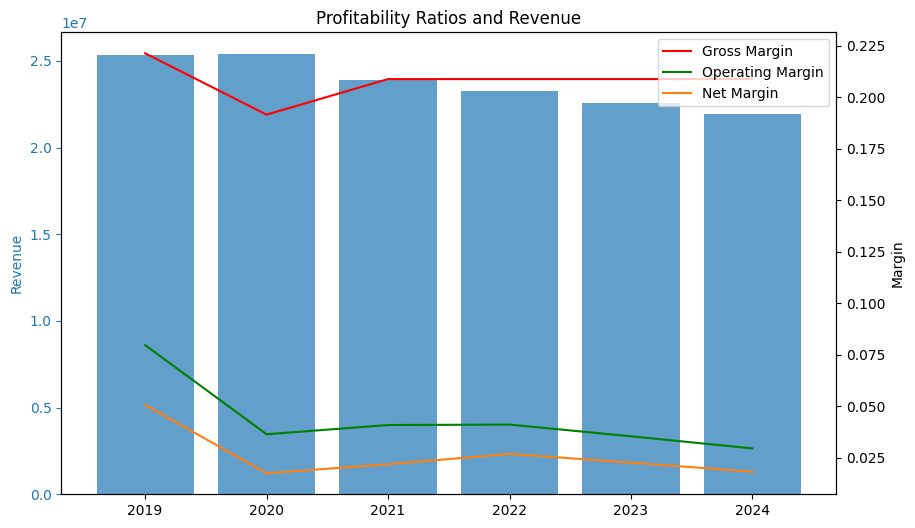

In [ ]:
# V.1 Profitability graph

import matplotlib.pyplot as plt
import numpy as np

# Extract values from dataframes
revenue_values = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Revenue', 'Year_2019':'For_2024'].values.flatten()
gross_profit_values = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Gross Profit', 'Year_2019':'For_2024'].values.flatten()
operating_income_values = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'EBIT', 'Year_2019':'For_2024'].values.flatten()
net_income_values = income_statement_for_df.loc[income_statement_for_df['Subcategory'] == 'Net Income', 'Year_2019':'For_2024'].values.flatten()

# Calculate margins
gross_margin = gross_profit_values / revenue_values
operating_margin = operating_income_values / revenue_values
net_margin = net_income_values / revenue_values

# Create bar chart with revenue data
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(range(6), revenue_values, alpha=0.7, color='tab:blue')
ax1.set_xticks(range(6))
ax1.set_xticklabels(['2019', '2020', '2021', '2022', '2023', '2024'])
ax1.set_ylabel('Revenue', color='tab:blue')
ax1.tick_params('y', colors='tab:blue')

# Create line chart with margins data
ax2 = ax1.twinx()
ax2.plot(gross_margin, 'r-', label='Gross Margin')
ax2.plot(operating_margin, 'g-', label='Operating Margin')
ax2.plot(net_margin, 'tab:orange', label='Net Margin')
ax1.set_title('Profitability Ratios and Revenue')
ax2.set_ylabel('Margin', color='k')
ax2.tick_params('y', colors='k')

# Display chart with legend
ax2.legend(loc='upper right')

plt.show()


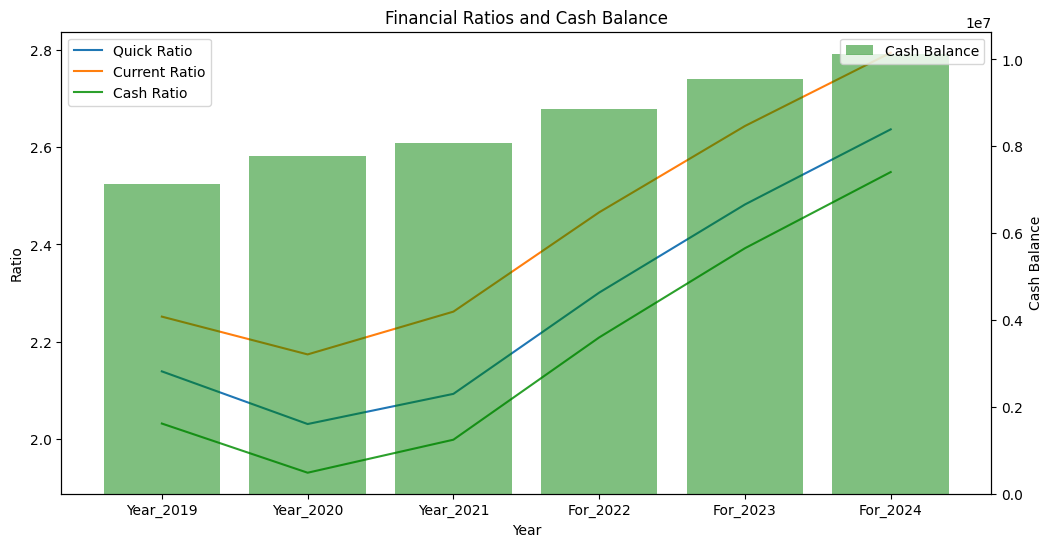

In [ ]:
# V.2 Liquidity graph

# Plot ratios
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(years, performance_ratios_df.loc['Quick Ratio'], label='Quick Ratio')
ax.plot(years, performance_ratios_df.loc['Current Ratio'], label='Current Ratio')
ax.plot(years, performance_ratios_df.loc['Cash Ratio'], label='Cash Ratio')

# Plot cash balance
ax2 = ax.twinx()
ax2.bar(years, balance_sheet_for_df.loc[0, years], alpha=0.5, color='green', label='Cash Balance')

ax.set_xlabel('Year')
ax.set_ylabel('Ratio')
ax2.set_ylabel('Cash Balance')
ax.set_title('Liquidity Ratios and Cash Balance')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

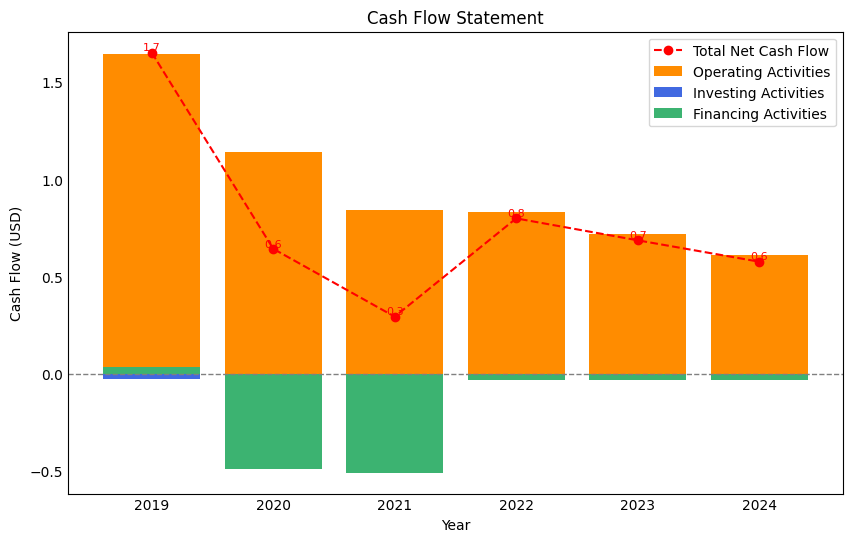

In [ ]:
# V.3 Cash-flow graph

# Filter relevant data from cash_flow_for_df
cash_flow_data = cash_flow_for_df.loc[cash_flow_for_df['Subcategory'].isin(['Cash Flow from Operating Activities', 'Cash Flow from Investing Activities', 'Cash Flow from Financing Activities'])]

# Extract values for each category and year
operating_cash_flow = cash_flow_data.loc[cash_flow_data['Subcategory'] == 'Cash Flow from Operating Activities', 'Year_2019':'For_2024'].values.flatten()/1_000_000
investing_cash_flow = cash_flow_data.loc[cash_flow_data['Subcategory'] == 'Cash Flow from Investing Activities', 'Year_2019':'For_2024'].values.flatten()/1_000_000
financing_cash_flow = cash_flow_data.loc[cash_flow_data['Subcategory'] == 'Cash Flow from Financing Activities', 'Year_2019':'For_2024'].values.flatten()/1_000_000

# Calculate total net cash flow for each year
total_net_cash_flow = operating_cash_flow + investing_cash_flow + financing_cash_flow

# Create stacked bar chart with cash flow data
years = np.arange(2019, 2025)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, operating_cash_flow, label='Operating Activities', color='darkorange')
ax.bar(years, investing_cash_flow, bottom=np.minimum(operating_cash_flow, 0), label='Investing Activities', color='royalblue')
ax.bar(years, financing_cash_flow, bottom=np.minimum(operating_cash_flow + investing_cash_flow, 0), label='Financing Activities', color='mediumseagreen')

# Plot the total net cash flow as a dotted line
ax.plot(years, total_net_cash_flow, linestyle='--', color='red', marker='o', label='Total Net Cash Flow')

# Add data labels for total net cash flow
for x, y in zip(years, total_net_cash_flow):
    ax.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color='red')

# Set x-axis label, y-axis label and title for cash flow subplot
ax.set_xlabel('Year')
ax.set_ylabel('Cash Flow (USD)')
ax.set_title('Cash Flow Statement')

# Set ticks and grid for the subplot
ax.tick_params(axis='both', which='both', length=0)
ax.axhline(y=0, color='gray', linewidth=1, linestyle='--')

# Set legend for the subplot and move it inside the graph area
ax.legend(loc='upper right')

# Show the plot
plt.show()
